# Question 16: Which node generated the smallest number of APPUNAV events?

# Section 1: Data Preparation and Preprocessing

**IMPORTING NECESSARY LIBRARIES**

In [1]:
# Importinng 'SparkSession' module which is the main entry point for DataFrame and SQL functionality. SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables and cache tables.
from pyspark.sql import SparkSession

# Importing 'Date (datetime.date)', 'Timestamp (datetime.datetime)' , 'Double' data type from 'Data Types' module  
from pyspark.sql.types import DateType, TimestampType, DoubleType

# importing built-in functions available for DataFrame.
from pyspark.sql.functions import to_date, to_timestamp, col, month

# Importing 'matplotlib.pyplot' module for creating and customizing plots and visualizations. 
# 'pyplot' is a part of the Matplotlib library and provides a user-friendly interface to create different types of plots.
import matplotlib.pyplot as plt

# Importing'time' module for measuring execution time
import time

**EXECUTION TIME COUNTER START**

In [2]:
# Recording the starting time of the execution using the 'time.perf_counter()' function.It provides a high-resolution timer that measures the time elapsed in seconds to measure its execution time.
executiontimestart= time.perf_counter()

In [3]:
# Initializing SparkSession named 'ScpProject' using the SparkSession builder.
session = SparkSession.builder.appName('ScpProject').getOrCreate()

23/08/11 21:30:42 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Reading data from CSV file into a DataFrame 'bgl_log_df'
bgl_log_df = session.read.csv("BGLnew.log", sep=',', inferSchema=True, header=False)

In [5]:
# Renaming the columns 'toDF()' method for better understanding into our dataframe.
bgl_log_df = bgl_log_df.toDF('alert_message_flag', 'timestamp', 'date', 'node', 'date_and_time', 'node_repeated',
                             'message_type', 'system_component', 'level', 'message_content')


In [6]:
# Parsing 'date' column to standard DateType
bgl_log_df = bgl_log_df.withColumn('date', to_date('date', 'yyyy.MM.dd'))

In [7]:
# Parsing 'date_and_time' column to standard TimestampType
bgl_log_df = bgl_log_df.withColumn('date_and_time', to_timestamp('date_and_time', 'yyyy-MM-dd-HH.mm.ss.SSSSSS'))

In [8]:
# Casting columns to appropriate data types
bgl_log_df = bgl_log_df.withColumn("timestamp", bgl_log_df["timestamp"].cast(TimestampType())) \
    .withColumn("date", bgl_log_df["date"].cast(DateType())) \
    .withColumn("date_and_time", bgl_log_df["date_and_time"].cast(TimestampType()))

In [9]:
# Using 'printSchema()' method to display the updated schema of the DataFrame 'bgl_log_df'.
bgl_log_df.printSchema()

root
 |-- alert_message_flag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- node: string (nullable = true)
 |-- date_and_time: timestamp (nullable = true)
 |-- node_repeated: string (nullable = true)
 |-- message_type: string (nullable = true)
 |-- system_component: string (nullable = true)
 |-- level: string (nullable = true)
 |-- message_content: string (nullable = true)



**DATA PREPRATION AND PREPROCESSING COMPLETED**

In [10]:
# We are using the 'show()' method to display the DataFrame 'bgl_log_df' in a vertical format.
# The 'vertical=True' argument is used to display the DataFrame vertically, showing each row in a single line.
# The 'truncate=False' argument is used to prevent truncation of column values, ensuring complete visibility of the data.
bgl_log_df.show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U11                      
 date_and_time      | 2005-06-03 15:42:50.363779               
 node_repeated      | R02-M1-N0-C:J12-U11                      
 message_type       | RAS                                      
 system_component   | KERNEL                                   
 level              | INFO                                     
 message_content    | instruction cache parity error corrected 
-RECORD 1------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U1

# Section 2: Log Data Analysis : Spark SQL

**TOTAL NUMBER OF LOG ENTRIES IN THE LOG DATASET COUNT**

In [11]:
# Count total logs in the DataFrame
total_logs_count = bgl_log_df.count()

# Display the total number of logs
total_logs_count

4747963

**CREATING TEMPORARY VIEW OF THE DATAFRAME**

In [12]:
# Using the 'createOrReplaceTempView()' method to create a temporary view of the DataFrame 'bgl_log_df'.
# This temporary view, named "bgllogtable," allows us to perform SQL queries and leverage the power of SQL to interact with the DataFrame and perform complex data analysis and transformations.
# NOTE: The temporary view exists for the duration of the SparkSession and can be queried using Spark SQL syntax.
bgl_log_df.createOrReplaceTempView("bgllogtable")

<span style="color:blue">**SQL Query for Question 16: Which node generated the smallest number of APPUNAV events?**</SPAN>

***1. SELECT node, COUNT(*) AS num_appunav_events***
   - 1. SELECT statement to retrieve the 'node' column and count the number of 'APPUNAV' events for each node.

***2. FROM bgllogtable***
   - 2. FROM clause to specify the source table 'bgllogtable'.

***3. WHERE alert_message_flag = 'APPUNAV'***
   - 3. WHERE clause to filter only 'APPUNAV' events.

***4. GROUP BY node***
   - 4. GROUP BY clause to group the results based on the 'node' column.

***5. ORDER BY num_appunav_events;***
   - 5. ORDER BY clause to order the 'num_appunav_events' in ascending order so that we have the visibility for all the nodes with smallest number of 'APPUNAV' event

<span style="color:blue">**The output of this SQL query will provide the count of APPUNAV events generated by each node in ascending order to show the nodes with smallest count of 'APPUNAV' event ?**<span style="color:blue">

In [13]:
SQL_question16="""
SELECT node, COUNT(*) AS num_appunav_events
FROM bgllogtable
WHERE alert_message_flag = 'APPUNAV'
GROUP BY node
ORDER BY num_appunav_events;
"""

**NODES WITH THE NUMBER OF 'APPUNAV' EVENTS IN ASCENDING ORDER**

In [14]:
# Using the 'session' object to execute an SQL query and display the results.
sql_result_df=session.sql(SQL_question16)
sql_result_df.show()

+-------------------+------------------+
|               node|num_appunav_events|
+-------------------+------------------+
|R44-M1-NC-I:J18-U01|                 1|
|R53-M1-N8-I:J18-U01|                 1|
|R64-M0-NC-I:J18-U01|                 1|
|R71-M1-NC-I:J18-U11|                 1|
|R76-M1-N4-I:J18-U11|                 1|
|R62-M0-N4-I:J18-U11|                 1|
|R42-M0-N4-I:J18-U01|                 1|
|R60-M1-N8-I:J18-U11|                 1|
|R41-M0-N0-I:J18-U01|                 1|
|R74-M1-N4-I:J18-U11|                 1|
|R71-M1-NC-I:J18-U01|                 1|
|R66-M1-NC-I:J18-U11|                 1|
|R57-M1-N4-I:J18-U11|                 1|
|R64-M0-N4-I:J18-U11|                 1|
|R60-M0-N8-I:J18-U01|                 1|
|R55-M0-N0-I:J18-U01|                 1|
|R71-M1-N8-I:J18-U01|                 1|
|R63-M0-NC-I:J18-U11|                 1|
|R70-M1-NC-I:J18-U01|                 1|
|R75-M0-N4-I:J18-U01|                 1|
+-------------------+------------------+
only showing top

**TOTAL NUMBER OF NODES WITH 'APPUNAV' EVENT**

In [15]:
sql_result_df.count()

1024

<span style="color:blue">***TOTAL NUMBER OF NODES THAT GENERATED THE SMALLEST NUMBER OF 'APPUNAV' EVENTS i.e 1***<span style="color:blue">

In [16]:
smallest_num_appunav_events= sql_result_df.filter("num_appunav_events = 1")
smallest_num_appunav_events.count()

512

<span style="color:blue">***LIST OF NODES THAT GENERATED THE SMALLEST NUMBER OF 'APPUNAV' EVENTS i.e 1***<span style="color:blue">

In [17]:
smallest_num_appunav_events.show(10)

+-------------------+------------------+
|               node|num_appunav_events|
+-------------------+------------------+
|R44-M1-NC-I:J18-U01|                 1|
|R64-M0-NC-I:J18-U01|                 1|
|R71-M1-NC-I:J18-U11|                 1|
|R76-M1-N4-I:J18-U11|                 1|
|R62-M0-N4-I:J18-U11|                 1|
|R42-M0-N4-I:J18-U01|                 1|
|R60-M1-N8-I:J18-U11|                 1|
|R41-M0-N0-I:J18-U01|                 1|
|R74-M1-N4-I:J18-U11|                 1|
|R71-M1-NC-I:J18-U01|                 1|
+-------------------+------------------+
only showing top 10 rows



In [18]:
#converting the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = sql_result_df.toPandas()

# Section 3: Visualization

**VISUALISING THE DISTRIBUTION BY SHOWING THE COUNT OF NODES WITH EXACTLY ONE 'APPUNAV' EVENT IN <span style="color:red">RED</span> AND THE NODES WITH MORE THAN 1 'APPUNAV' EVENT IS MARKED <span style="color:blue">BLUE</span>**

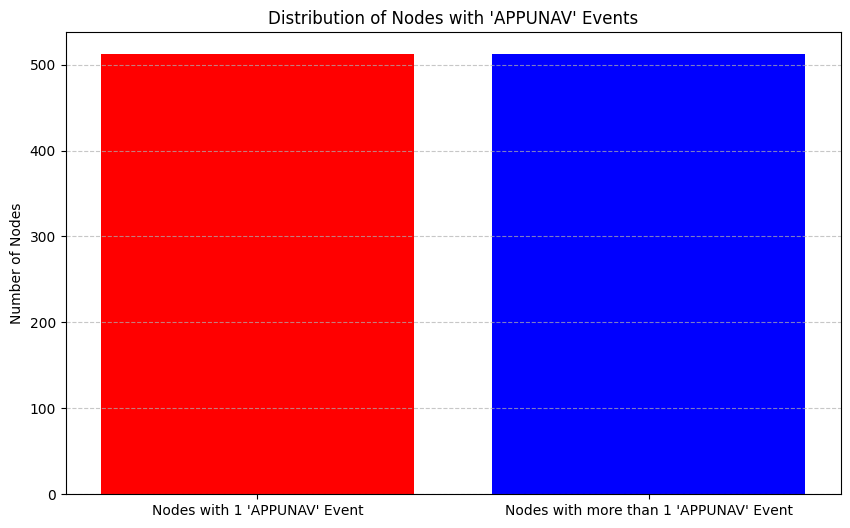

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(["Nodes with 1 'APPUNAV' Event", "Nodes with more than 1 'APPUNAV' Event"],
        [smallest_num_appunav_events.count(), sql_result_df.count() - smallest_num_appunav_events.count()], color=["red", "blue"])

# Adding labels and title
plt.ylabel("Number of Nodes")
plt.title("Distribution of Nodes with 'APPUNAV' Events")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.show()

In [20]:
# Measuring end of execution time. 
#https://docs.python.org/3/library/time.html
#returns the value (in fractional seconds) of a performance counter.It does include time elapsed during sleep and is system-wide.
executiontimeend= time.perf_counter()

In [21]:
# Calculating the total execution time by subtracting the start time from the end time.
# Calculating the total execution time as  time.perf_counter() returns the absolute value of the counter
# https://stackoverflow.com/questions/25785243/understanding-time-perf-counter-and-time-process-time
totalexecution_time= executiontimeend - executiontimestart
totalexecution_time

14.664776831006748

In [22]:
# all the information on the 'spark runtime environment', executors sumamry, jobs and its stages can be found on 'Spark UI'
spark